# HEATMAPS

In [1]:
import pandas as pd
import numpy as np
import helper as hp
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df_prod = pd.read_pickle("../data/df_prod.pkl")

In [3]:
df_value = pd.read_pickle("../data/df_value.pkl")

In [4]:
df_trade = pd.read_pickle("../data/df_trade.pkl")

In [5]:
df_valpt = pd.read_pickle("../data/df_valpt.pkl")

In [6]:
df_imp = pd.read_pickle("../data/df_imp.pkl")

In [7]:
df_exp = pd.read_pickle("../data/df_exp.pkl")

## A. Focusing on countries (all for year 2016)

* A.1. Similarity considering the **products** they **produce**
* A.2. Similarity considering the **countries** they **export**
* A.3. Similarity considering the **countries** they **import**
* A.4. Similarity considering the **import-export** **countries** in common
* A.5. Similarity considering the **products** they **export**
* A.6. Similarity considering the **products** they **import**
* A.7. Similarity considering the **import-export** **products** --> The most interesting in my opinion

From the matrixes A.7., we could analyze that if the jaccard similarity for the same country is really high, it would mean that they are importing the same as they export. We could also look to the countries that import the same products as other country exports, so we can find trade relations amongst countries. If we find the interesting relations we could take a look to which kind of products these are. Also, in A.3., we could look to countries that import to the same countries as other countries export, so we can also find some paths.

If we look to the similarity considering the products produced, we could analyze also if countries with high similarity have similar *climate/weather* conditions to produce the same products. All this matrixes can be related to what they import/export to but not clear how yet hehe.

#### To include:
* We could do the same but focusing on products, instead of countries.
* We couls select a subset of countries because there are many clearly not relevant and we cannot plot all of them.
* Should we normalize and establish a treshold? (We may be considering countries/products where the production/import/export is minimum)

### A.1. Similarity amogst countries considering the products produced

In [8]:
df_prod.head(2)

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Area harvested,ha,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,12000.0,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,16364.0,16364.0,16364.0,16364.0,16364.0,16364.0,...,26234.0,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0


In [9]:
# Delete this items with 0 value of production
df_prod_simil = df_prod.loc[df_prod['Y2016'] != 0][['Area','Item','Y2016']].copy()

In [10]:
# We group by area, and list the items for each area
df_prod_simil = df_prod_simil.groupby('Area')['Item'].apply(list).reset_index(name='Collection Items')

In [11]:
df_prod_simil.head()

,Area,Collection Items
0,Afghanistan,"[Almonds, with shell, Almonds, with shell, Alm..."
1,Albania,"[Apples, Apples, Apples, Apricots, Apricots, A..."
2,Algeria,"[Almonds, with shell, Almonds, with shell, Alm..."
3,American Samoa,"[Bananas, Bananas, Bananas, Beans, green, Bean..."
4,Angola,"[Bananas, Bananas, Bananas, Beans, dry, Beans,..."


In [12]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [13]:
# Compute Jaccard similarity
n = len(df_prod_simil)
matrix_similarity_products = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_prod_simil['Collection Items'].iloc[i]
        list2 = df_prod_simil['Collection Items'].iloc[j]
        matrix_similarity_products[i][j] = jaccard_similarity(list1, list2)

In [14]:
labels = df_prod_simil['Area']

Text(0.5, 1, 'Products produced similarity')

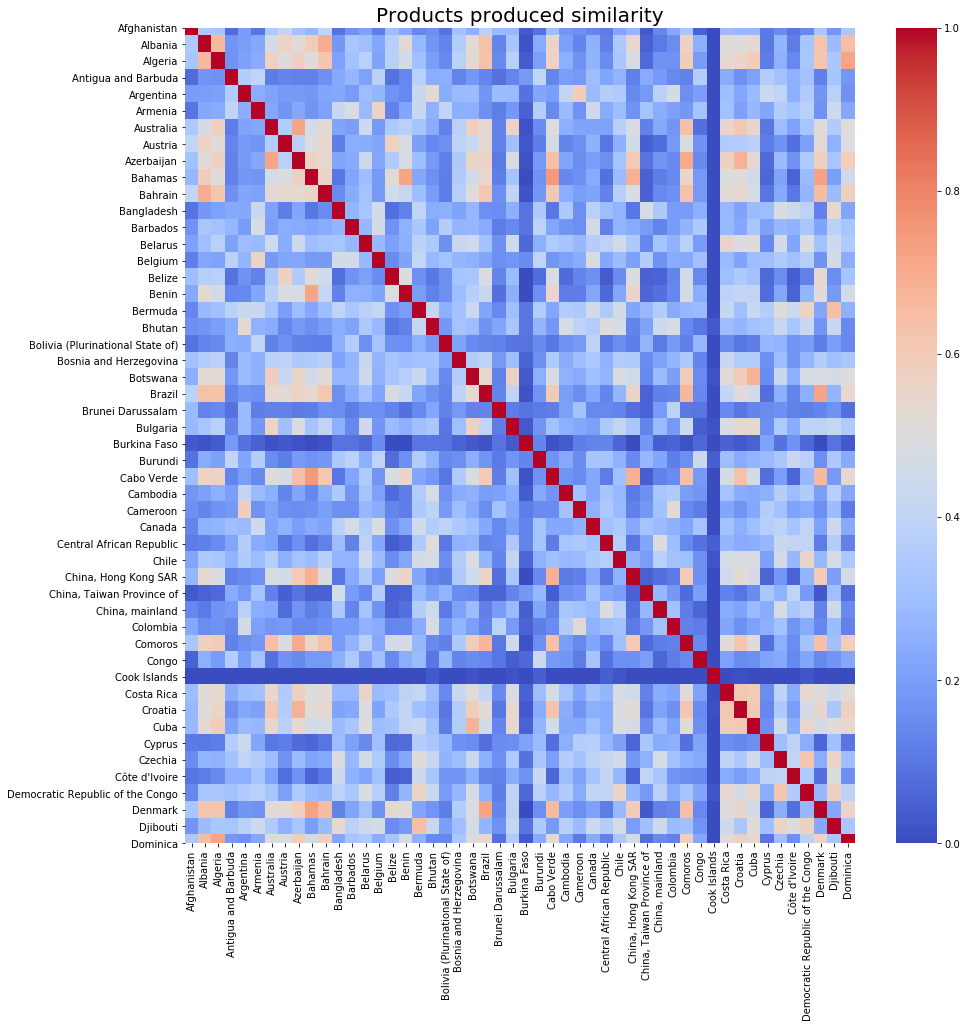

In [41]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_products[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products produced similarity', fontsize = 20)

### A.2. Similarity amogst countries considering the countries they export to

In [16]:
df_exp.head(2)

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,Australia,Apricots,Export value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Delete this items with 0 value of production
df_exp_simil = df_exp.loc[df_exp['Y2016'] != 0][['Reporter Countries','Partner Countries','Y2016']].copy()

In [18]:
# We group by area, and list the items for each area
df_exp_simil = df_exp_simil.groupby('Reporter Countries')['Partner Countries'].apply(list).reset_index(name='Partner Countries')

In [19]:
labels = df_exp_simil['Reporter Countries']

In [31]:
# Compute Jaccard similarity
n = len(df_exp_simil)
matrix_similarity_partner_exp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_exp_simil['Partner Countries'].iloc[i]
        list2 = df_exp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_exp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Countries they export to')

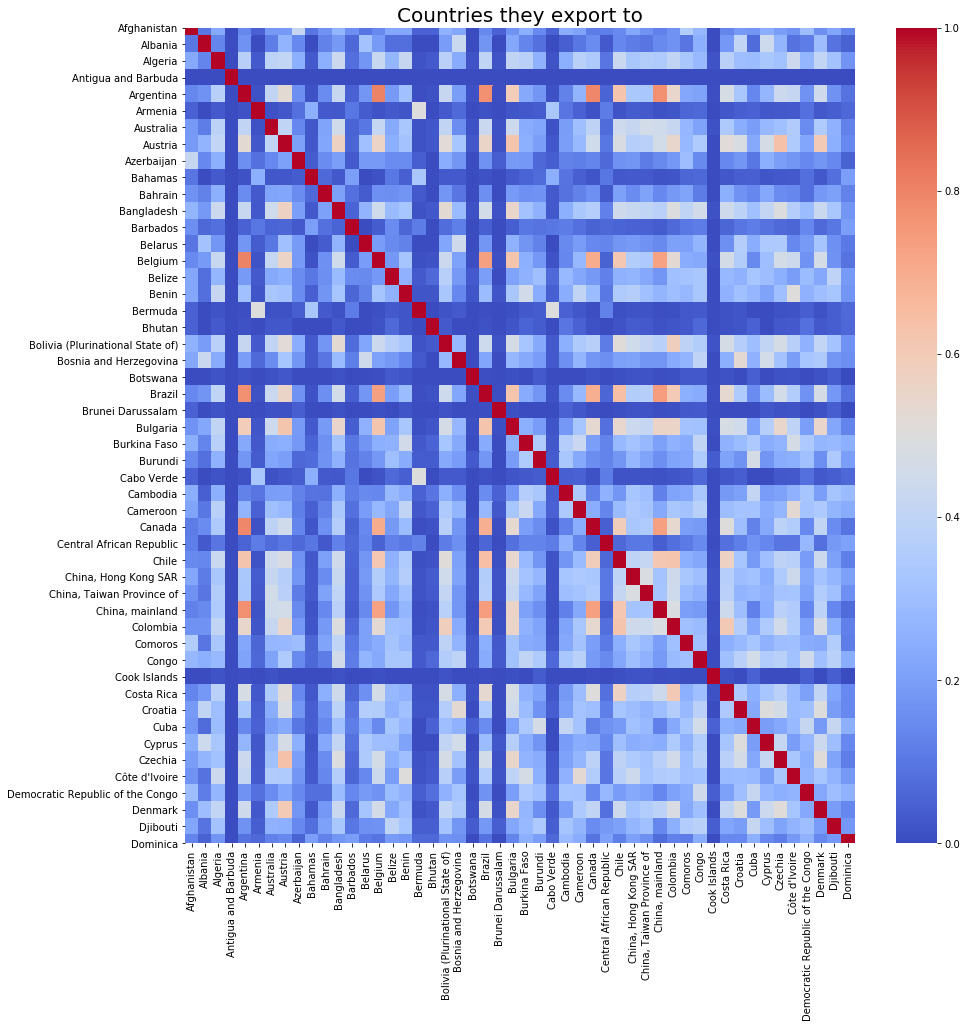

In [44]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_partner_exp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Countries they export to', fontsize = 20)

### A.3. Similarity amongst countries where they import

In [36]:
df_imp.head(2)

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,Argentina,Maize,Import value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,Azerbaijan,Tea,Import value/quantity,1000 US$/tonne,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5,0.0,0.0


In [37]:
# Delete this items with 0 value of production
df_imp_simil = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Partner Countries','Y2016']].copy()
df_imp_simil = df_imp_simil.groupby('Reporter Countries')['Partner Countries'].apply(list).reset_index(name='Partner Countries')

In [38]:
# Compute Jaccard similarity
n1 = len(df_imp_simil)
n2 = len(df_imp_simil)
matrix_similarity_partner_imp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_imp_simil['Partner Countries'].iloc[i]
        list2 = df_imp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_imp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Countries they import from')

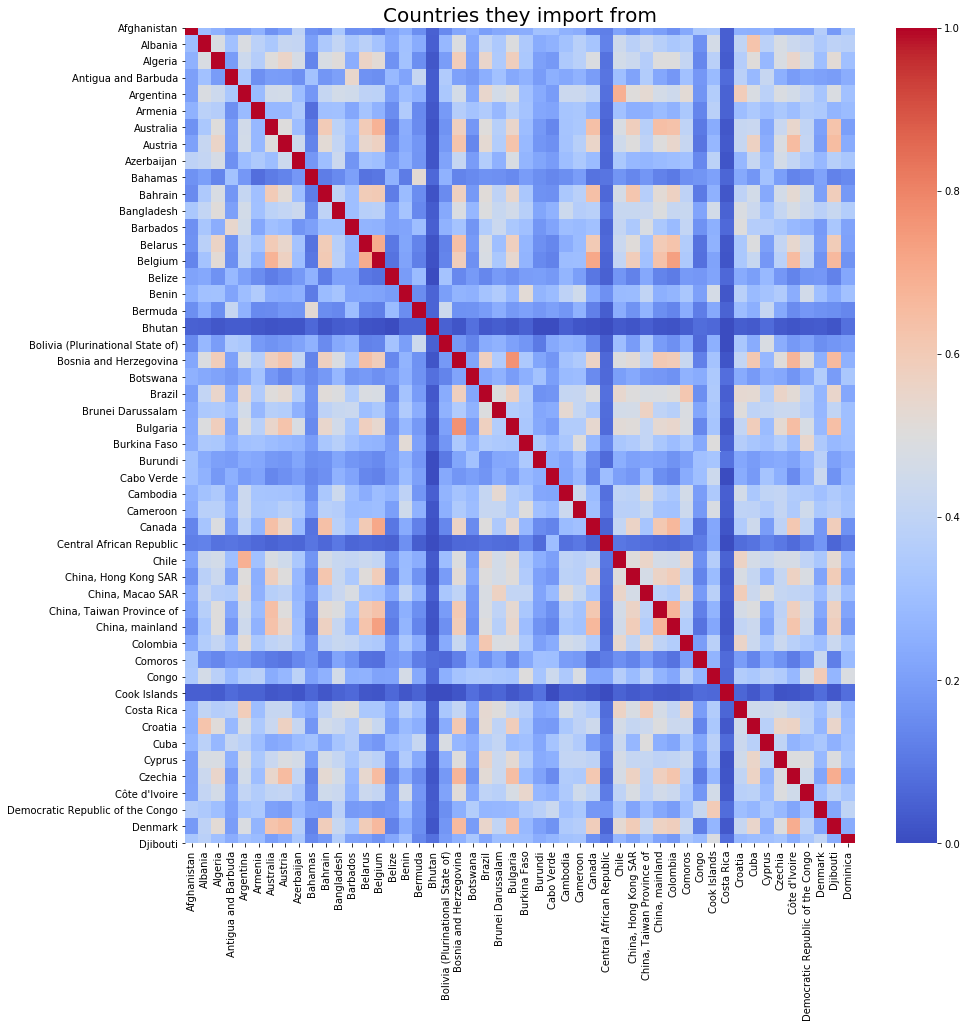

In [43]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_partner_imp[:50,:50], xticklabels = xlabels[:50], yticklabels = ylabels[:50], cmap='coolwarm')
plt.title('Countries they import from', fontsize = 20)

### A.4. Similarity amongst countries where they import-export and viceversa.

In [25]:
# Compute Jaccard similarity
n1 = len(df_exp_simil)
n2 = len(df_imp_simil)
matrix_similarity_partner_impexp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_exp_simil['Partner Countries'].iloc[i]
        list2 = df_imp_simil['Partner Countries'].iloc[j]
        matrix_similarity_partner_impexp[i][j] = jaccard_similarity(list1, list2)

In [28]:
xlabels = df_exp_simil['Reporter Countries']
ylabels = df_imp_simil['Reporter Countries']

Text(0.5, 1, 'Countries import-export and viceversa')

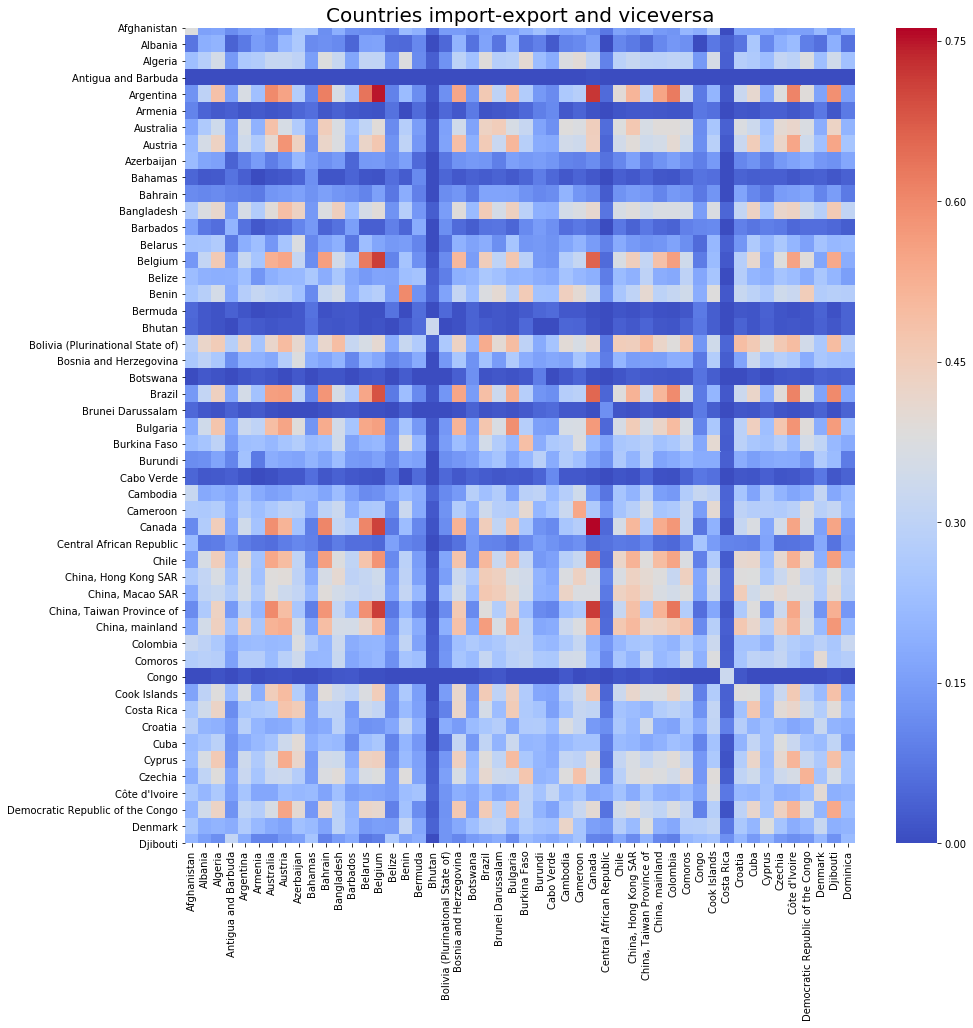

In [45]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_partner_impexp[:50,:50], xticklabels = xlabels[:50], yticklabels = ylabels[:50], cmap='coolwarm')
plt.title('Countries import-export and viceversa', fontsize = 20)

Belgium is importing to a lot of countries from which Argentina is exporting --> maybe it is interesting to analyze which kind of products. Could this be done directly from one to the other?

### A.5. Similarity considering the products they export

In [50]:
# Delete this items with 0 value of production
df_exp_simil_prod = df_exp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_exp_simil_prod = df_exp_simil_prod.groupby('Reporter Countries')['Item'].apply(list).reset_index(name='Products Exported')
df_exp_simil_prod.head(2)

,Reporter Countries,Products Exported
0,Afghanistan,"[Lemons and limes, Anise, badian, fennel, cori..."
1,Albania,"[Apples, Beans, green, Cauliflowers and brocco..."


In [51]:
# Compute Jaccard similarity
n = len(df_exp_simil_prod)
matrix_similarity_product_exp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_exp_simil_prod['Products Exported'].iloc[i]
        list2 = df_exp_simil_prod['Products Exported'].iloc[j]
        matrix_similarity_product_exp[i][j] = jaccard_similarity(list1, list2)

In [52]:
labels = df_exp_simil_prod['Reporter Countries']

Text(0.5, 1, 'Products exported similarity')

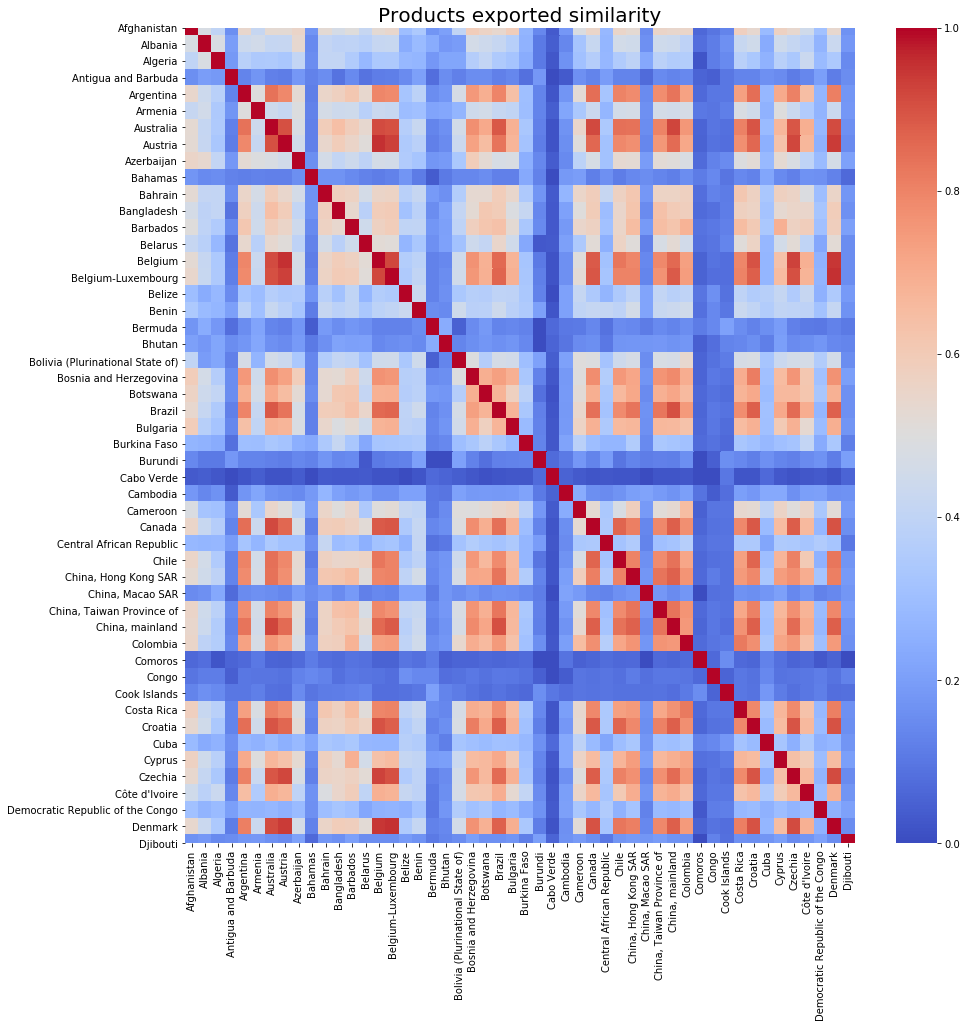

In [53]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_exp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products exported similarity', fontsize = 20)

### A.6. Similarity considering the products they import 

In [54]:
# Delete this items with 0 value of production
df_imp_simil_prod = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_imp_simil_prod = df_imp_simil_prod.groupby('Reporter Countries')['Item'].apply(list).reset_index(name='Products Imported')
df_imp_simil_prod.head(2)

,Reporter Countries,Products Imported
0,Afghanistan,"[Vegetables, fresh nes, Sunflower seed, Lentil..."
1,Albania,"[Lemons and limes, Maize, Onions, dry, Chillie..."


In [56]:
# Compute Jaccard similarity
n = len(df_imp_simil_prod)
matrix_similarity_product_imp = np.empty((n,n))
for i in range(n):
    for j in range(n):
        list1 = df_imp_simil_prod['Products Imported'].iloc[i]
        list2 = df_imp_simil_prod['Products Imported'].iloc[j]
        matrix_similarity_product_imp[i][j] = jaccard_similarity(list1, list2)

Text(0.5, 1, 'Products imported similarity')

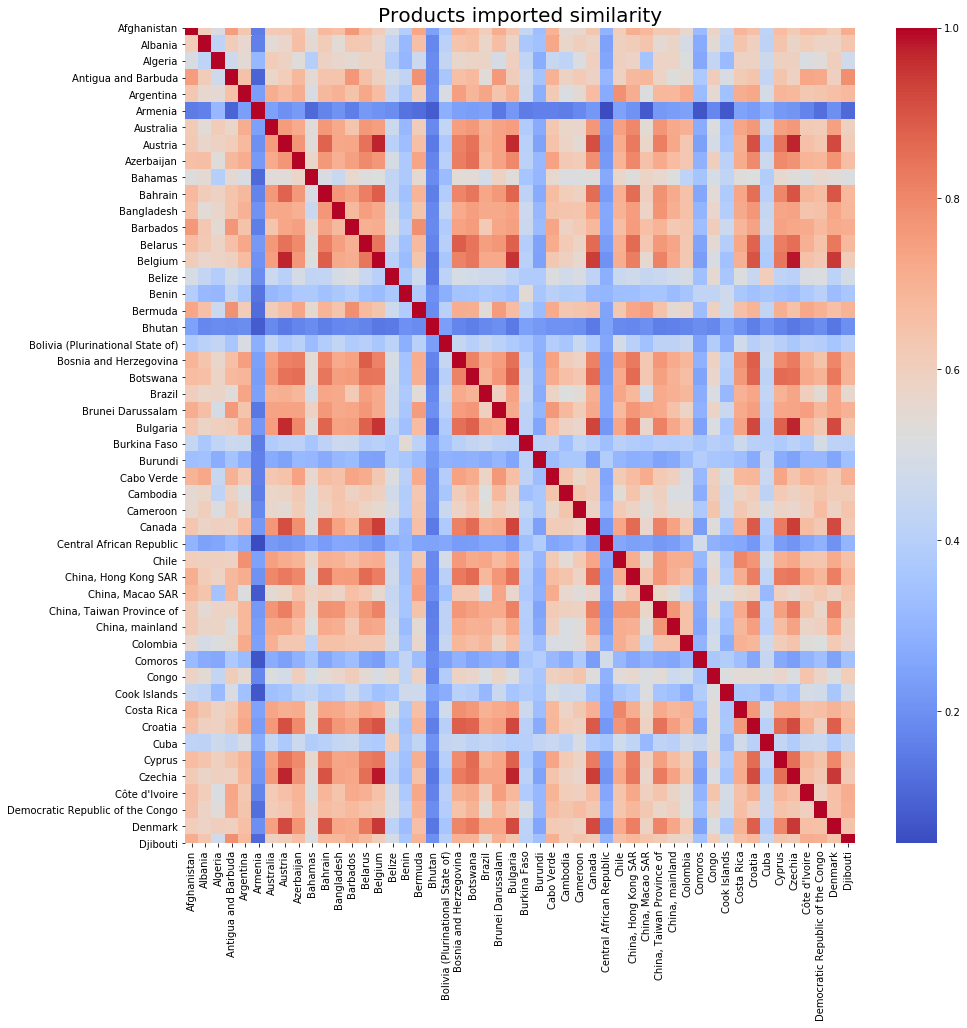

In [57]:
labels = df_imp_simil_prod['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_imp[:50, :50], xticklabels = labels[:50], yticklabels = labels[:50],  cmap='coolwarm')
plt.title('Products imported similarity', fontsize = 20)

### A.7. Similarity products imported-exported

In [58]:
# Compute Jaccard similarity
n1 = len(df_exp_simil_prod)
n2 = len(df_imp_simil_prod)
matrix_similarity_product_impexp = np.empty((n1,n2))
for i in range(n1):
    for j in range(n2):
        list1 = df_exp_simil_prod['Products Exported'].iloc[i]
        list2 = df_imp_simil_prod['Products Imported'].iloc[j]
        matrix_similarity_product_impexp[i][j] = jaccard_similarity(list1, list2)

Text(113.99999999999999, 0.5, 'Countries that export')

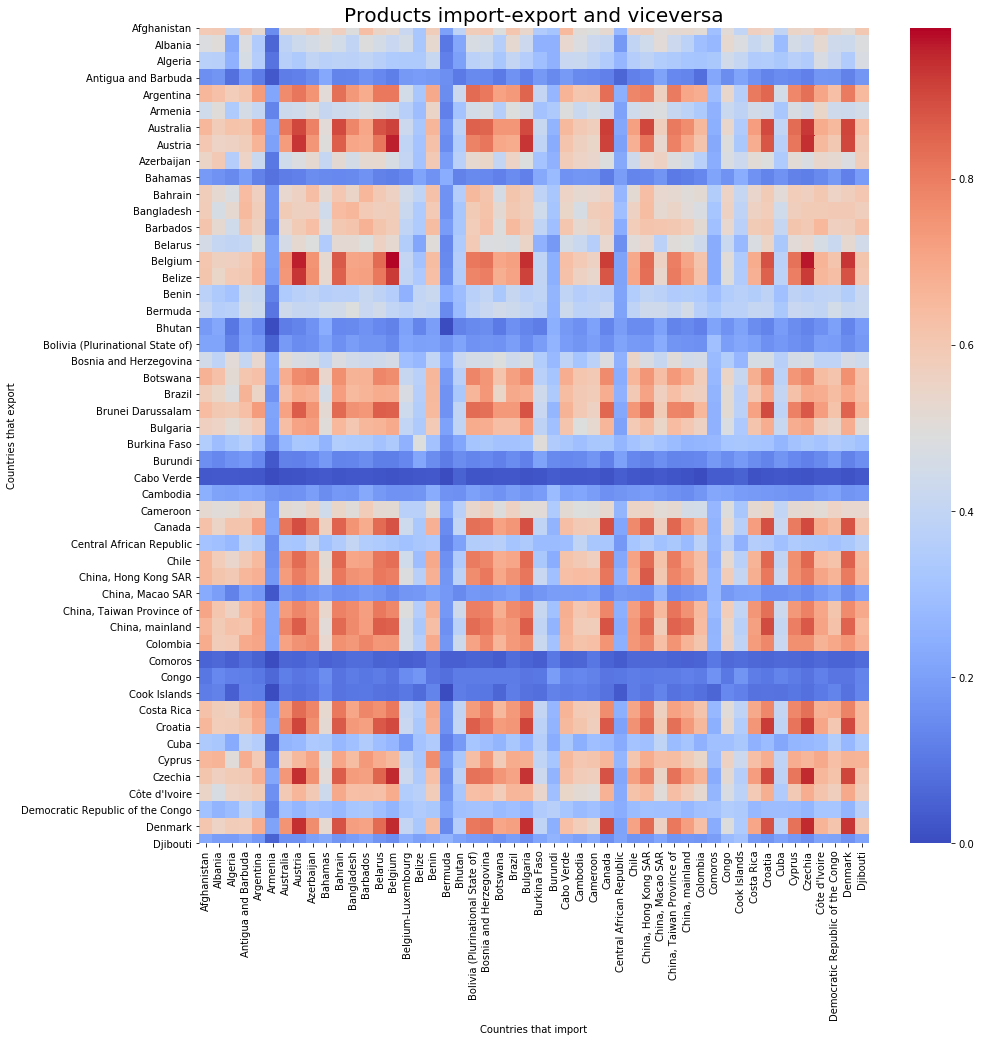

In [60]:
xlabels = df_exp_simil_prod['Reporter Countries']
ylabels = df_imp_simil_prod['Reporter Countries']
plt.figure(figsize = (15,15))
sns.heatmap(matrix_similarity_product_impexp[:50,:50], xticklabels = xlabels[:50], yticklabels = ylabels[:50], cmap='coolwarm')
plt.title('Products import-export and viceversa', fontsize = 20)
plt.xlabel('Countries that import')
plt.ylabel('Countries that export')